In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ
from qiskit.test.mock import FakeVigo

from analysis.analysis import run_circuits, analyze_results, analyze_results_ignis
from analysis.constants import SIMULATOR
from analysis.error_correction import CustomErrorCorrection, IgnisErrorCorrection

In [2]:
IBMQ.load_account()
PROVIDER = IBMQ.get_provider(hub='ibm-q-research', group='hu-berlin-1', project='main')
PROVIDER.backends()
BACKEND_HARDWARE = FakeVigo()
BACKEND_SIMULATOR = PROVIDER.get_backend(SIMULATOR)

In [3]:

time_vector = np.arange(1, 2, 0.2)
hpc_res, circuits = run_circuits(number_links=4, backend=BACKEND_HARDWARE, time_vector=time_vector)

/home/miguel/Documents/WORK/Research/plaquette-models/venv/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


In [8]:
time_vector = np.arange(1, 2, 0.2)
hpc_res_sim, circuits_sim = run_circuits(number_links=4, backend=BACKEND_SIMULATOR, time_vector=time_vector)

In [7]:
hpc_res.get_counts()

[{'00000': 2367, '11101': 5825},
 {'00000': 1104, '11101': 7088},
 {'00000': 220, '11101': 7972},
 {'00000': 11, '11101': 8181},
 {'00000': 441, '11101': 7751}]

In [5]:
natural_count_sim, _ = analyze_results(number_links=4, result_hpc=hpc_res_sim, time_vector=time_vector,
                                                 circuits=circuits_sim)

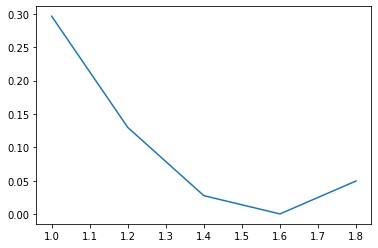

In [14]:
plt.plot(time_vector, natural_count_sim)

In [6]:
error_correction = CustomErrorCorrection(n_qubits=5, shots=1000)
error_correction = error_correction.build_probability_matrix(backend=BACKEND_HARDWARE)

natural_count, corrected_count = analyze_results(number_links=4, result_hpc=hpc_res, time_vector=time_vector,
                                                 circuits=circuits, output_correction=error_correction)

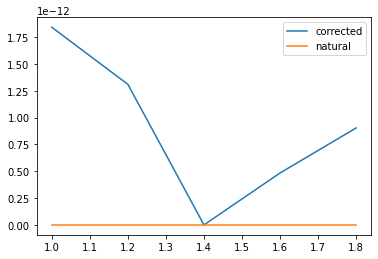

In [12]:
# plt.plot(time_vector, natural_count_sim, label='simulator')
plt.plot(time_vector, corrected_count, label='corrected')
plt.plot(time_vector, natural_count, label='natural')
plt.legend()

In [11]:
ignis_err_corr = IgnisErrorCorrection(n_qubits=5, shots=1000)
meas_filter = ignis_err_corr.get_meas_fitter(backend=BACKEND_HARDWARE)
natural_count, corrected_count = analyze_results_ignis(number_links=4, result_hpc=hpc_res, time_vector=time_vector,
                                                       circuits=circuits, result_key='11111',
                                                       meas_filter=meas_filter)